In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score

In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.24.1'

In [4]:
df = pd.read_csv('beatport_2021jan.csv')
df.drop(['artist','track'], axis=1, inplace=True) 
X = df.drop('genre', axis=1)

In [5]:
X.head()

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,83-beats_loudness_band_ratio.mean3,84-beats_loudness_band_ratio.mean4,85-beats_loudness_band_ratio.mean5,86-beats_loudness_band_ratio.mean6,87-beats_loudness_band_ratio.stdev1,88-beats_loudness_band_ratio.stdev2,89-beats_loudness_band_ratio.stdev3,90-beats_loudness_band_ratio.stdev4,91-beats_loudness_band_ratio.stdev5,92-beats_loudness_band_ratio.stdev6
0,0.079425,0.089604,3.120111,0.214365,0.234222,0.633007,0.012340,0.150022,-23.770716,2.118928,...,0.058442,0.032402,0.024159,0.300503,0.248348,0.131157,0.109375,0.070657,0.027211,0.223204
1,0.049946,0.066472,3.099221,0.164947,0.217858,0.397340,0.018363,0.079529,-23.910628,2.304411,...,0.087221,0.063572,0.026616,0.009315,0.358702,0.160241,0.164309,0.112424,0.067507,0.021833
2,0.073689,0.072842,3.114776,0.201525,0.239958,0.554679,0.013654,0.116526,-23.883897,2.080150,...,0.260990,0.056078,0.045613,0.049592,0.460217,0.033355,0.317956,0.089679,0.078159,0.078740
3,0.074295,0.143877,3.184615,0.196423,0.231027,0.632171,0.013408,0.098109,-22.323175,2.178740,...,0.180866,0.094388,0.028915,0.017663,0.365594,0.086201,0.221063,0.137246,0.041445,0.028583
4,0.092794,0.061911,3.146484,0.219616,0.250961,0.716576,0.011783,0.162721,-23.549247,2.516020,...,0.064147,0.042904,0.011318,0.013010,0.260539,0.102057,0.098144,0.089875,0.025987,0.031015


In [6]:
y = df['genre']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
BP2021 = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.77,
           max_leaf_nodes=None, min_impurity_decrease=0,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0, n_estimators=325, n_jobs=4,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [9]:
accuracy = cross_val_score(BP2021, X_train, y_train, cv=10)
print(f'Train CV (10-fold) accuracy: {round(accuracy.mean(),3)} +/- {round(accuracy.std(), 3)}')

Train CV (10-fold) accuracy: 0.534 +/- 0.025


In [10]:
accuracy = cross_val_score(BP2021, X_test, y_test, cv=10)
print(f'Test CV (10-fold) accuracy: {round(accuracy.mean(),3)} +/- {round(accuracy.std(), 3)}')

Test CV (10-fold) accuracy: 0.481 +/- 0.069


In [11]:
BP2021.fit(X_train, y_train)
print(f'Test F1 score: {round(f1_score(y_test, BP2021.predict(X_test), average="macro"), 3)}')

Test F1 score: 0.545


In [12]:
import matplotlib.pyplot as pyplot

Feature: 0, Score: 0.00917
Feature: 1, Score: 0.01913
Feature: 2, Score: 0.01052
Feature: 3, Score: 0.01346
Feature: 4, Score: 0.00931
Feature: 5, Score: 0.00909
Feature: 6, Score: 0.01679
Feature: 7, Score: 0.00834
Feature: 8, Score: 0.01956
Feature: 9, Score: 0.00900
Feature: 10, Score: 0.00764
Feature: 11, Score: 0.00596
Feature: 12, Score: 0.00608
Feature: 13, Score: 0.00626
Feature: 14, Score: 0.00570
Feature: 15, Score: 0.00537
Feature: 16, Score: 0.00595
Feature: 17, Score: 0.00610
Feature: 18, Score: 0.00538
Feature: 19, Score: 0.00496
Feature: 20, Score: 0.00538
Feature: 21, Score: 0.00513
Feature: 22, Score: 0.00532
Feature: 23, Score: 0.01322
Feature: 24, Score: 0.00543
Feature: 25, Score: 0.00536
Feature: 26, Score: 0.00500
Feature: 27, Score: 0.00870
Feature: 28, Score: 0.00613
Feature: 29, Score: 0.00586
Feature: 30, Score: 0.00497
Feature: 31, Score: 0.00736
Feature: 32, Score: 0.00528
Feature: 33, Score: 0.00856
Feature: 34, Score: 0.01059
Feature: 35, Score: 0.00899
Fe

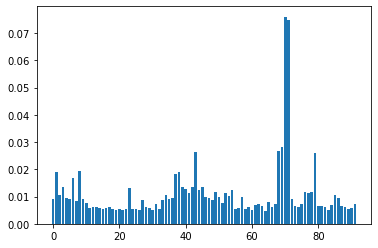

In [13]:
importance = BP2021.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()